# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
import os
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.2
1.21.5
0.11.2


# Load Dataset

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4267,1,9.00,0,0.00,49,"1,164.42",0.05,0.06,0.00,1.00,May,3,2,1,4,Returning_Visitor,True,False
11862,5,140.00,0,0.00,21,839.42,0.01,0.01,30.84,0.00,Dec,3,2,3,1,Returning_Visitor,False,True
1272,5,376.80,3,105.67,6,441.47,0.00,0.00,0.00,0.00,Mar,2,2,1,1,Returning_Visitor,False,False
11105,4,140.75,2,8.00,16,"2,073.38",0.00,0.02,0.00,0.00,Nov,3,2,3,2,Returning_Visitor,False,False
4929,0,0.00,0,0.00,6,62.00,0.13,0.17,0.00,0.00,May,3,2,2,3,Returning_Visitor,False,False


# EDA

## Descriptive Statistics

In [ ]:
#Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Mengelompokan kolom per type

categorical = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numerical = df.drop(categorical, axis=1).columns

print('Kolom tipe objek:\n', list(categorical),'\n')
print('Kolom tipe numerik:\n', list(numerical))

Kolom tipe objek:
 ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'] 

Kolom tipe numerik:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [ ]:
# Deskripsi statistik kolom type numerik

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,"12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00"
mean,2.32,80.82,0.50,34.47,31.73,"1,194.75",0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,"1,913.67",0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,"1,464.16",0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,"3,398.75",24.00,"2,549.38",705.00,"63,973.52",0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [ ]:
# Deskripsi statistik kolom type numerik

df[categorical].describe()

,OperatingSystems,Browser,Region,TrafficType
count,"12,330.00","12,330.00","12,330.00","12,330.00"
mean,2.12,2.36,3.15,4.07
std,0.91,1.72,2.40,4.03
min,1.00,1.00,1.00,1.00
25%,2.00,2.00,1.00,2.00
50%,2.00,2.00,3.00,2.00
75%,3.00,2.00,4.00,4.00
max,8.00,13.00,9.00,20.00


In [ ]:
df[['Month','VisitorType','Weekend','Revenue']].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [ ]:
# Cek missing value

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# cek duplikat

df.duplicated(keep=False).sum()

201

In [ ]:
df[df.duplicated(keep=False)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
# Frekuensi nilai tiap kolom tipe numerik

for i in numerical:
    print('Frekuensi nilai kolom',i,':\n', df[i].value_counts(),'\n')

Frekuensi nilai kolom Administrative :
 0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64 

Frekuensi nilai kolom Administrative_Duration :
 0.00      5903
4.00        56
5.00        53
7.00        45
11.00       42
          ... 
68.01        1
362.30       1
90.70        1
760.90       1
150.36       1
Name: Administrative_Duration, Length: 3335, dtype: int64 

Frekuensi nilai kolom Informational :
 0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64 

Frekuensi nilai kolom Informational_Duration :
 0.00      9925
9.00        33
7.00        

In [ ]:
# Frekuensi nilai tiap kolom tipe kategori

for i in categorical:
    print('Frekuensi nilai kolom',i,':\n', df[i].value_counts(),'\n')
    

Frekuensi nilai kolom Month :
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64 

Frekuensi nilai kolom OperatingSystems :
 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64 

Frekuensi nilai kolom Browser :
 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64 

Frekuensi nilai kolom Region :
 1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64 

Frekuensi nilai kolom TrafficType :
 2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64 

Fr

In [ ]:
# nilai unik tiap kolom tipe numerik

for i in numerical:
    print('Nilai unik nilai kolom',i,':\n', df[i].unique(),'\n')

Nilai unik nilai kolom Administrative :
 [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Nilai unik nilai kolom Administrative_Duration :
 [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Nilai unik nilai kolom Informational :
 [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Nilai unik nilai kolom Informational_Duration :
 [  0.   120.    16.   ... 547.75 368.25 211.25] 

Nilai unik nilai kolom ProductRelated :
 [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112


In [ ]:
# nilai unik tiap kolom tipe kategori

for i in categorical:
    print('Nilai unik nilai kolom',i,':\n', df[i].unique(),'\n')

Nilai unik nilai kolom Month :
 ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 

Nilai unik nilai kolom OperatingSystems :
 [1 2 4 3 7 6 8 5] 

Nilai unik nilai kolom Browser :
 [ 1  2  3  4  5  6  7 10  8  9 12 13 11] 

Nilai unik nilai kolom Region :
 [1 9 2 3 4 5 6 7 8] 

Nilai unik nilai kolom TrafficType :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20] 

Nilai unik nilai kolom VisitorType :
 ['Returning_Visitor' 'New_Visitor' 'Other'] 

Nilai unik nilai kolom Weekend :
 [False  True] 

Nilai unik nilai kolom Revenue :
 [False  True] 



## Univariate Analysis

In [ ]:
df[numerical].columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [ ]:
df[categorical].columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


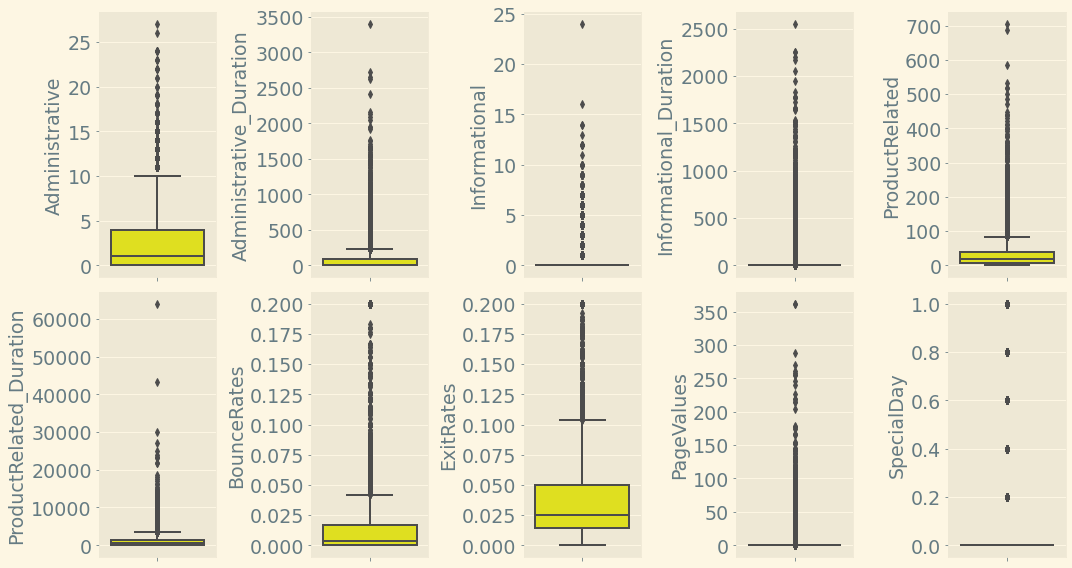

In [ ]:
# Kolom numerical

plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,8))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[z[i]], color='yellow',orient='v')
    plt.ylabel(z[i],size=19)
    plt.yticks(size=19)
    plt.tight_layout()

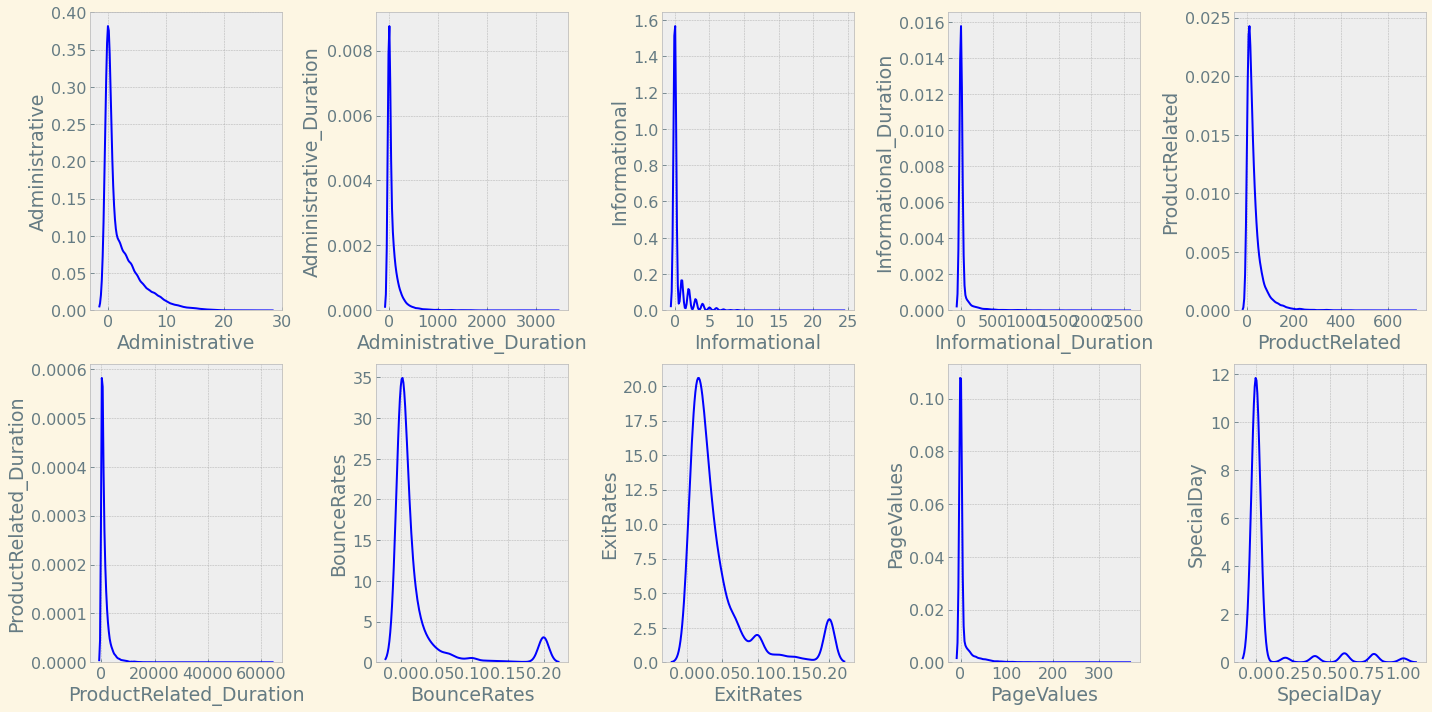

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(20,10))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[z[i]], color='blue')
    plt.xlabel(z[i],size=19)
    plt.ylabel(z[i], size=19)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.tight_layout()

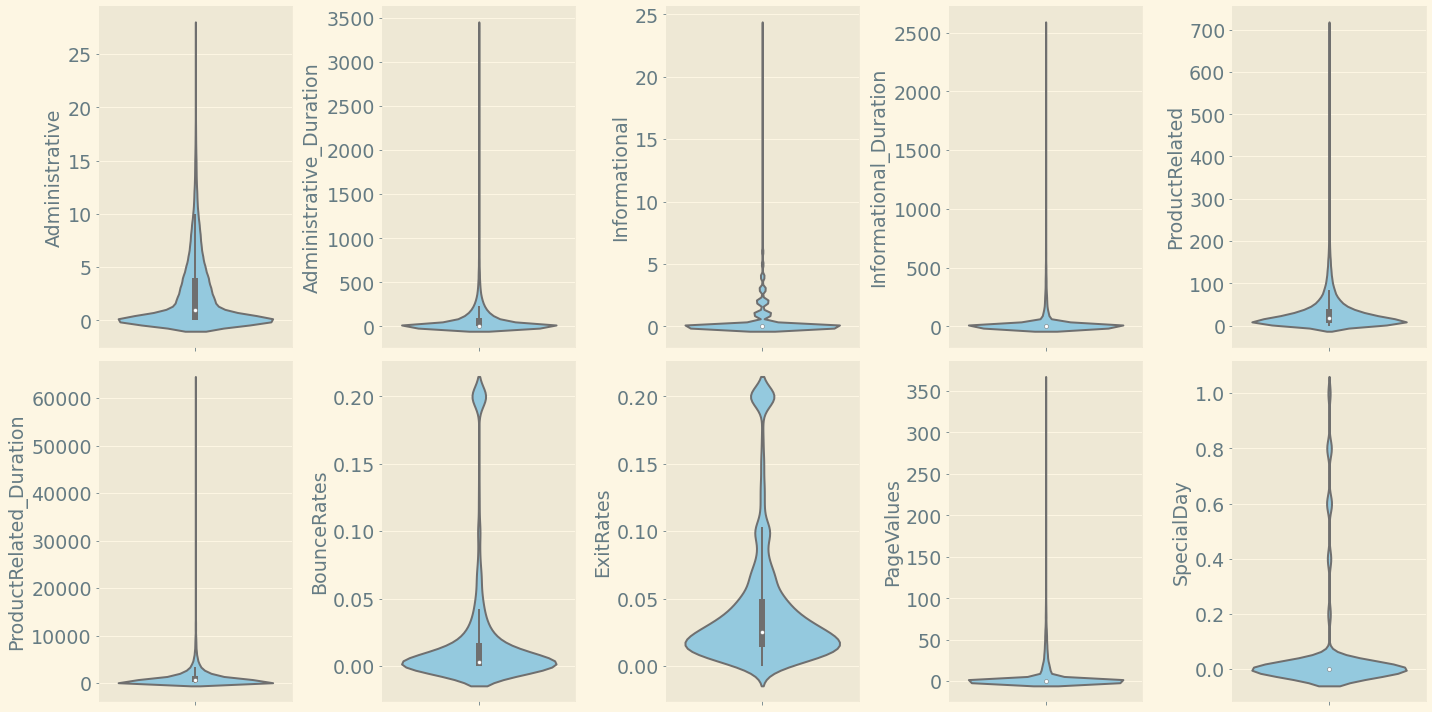

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.violinplot(y=df[z[i]], color='skyblue')
    plt.ylabel(z[i],size=19)
    plt.yticks(size=19)
    plt.tight_layout()

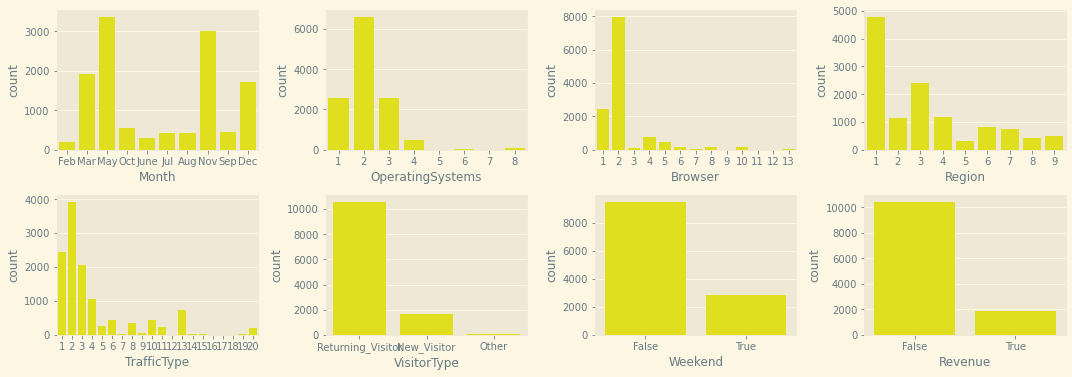

In [ ]:
# Kolom categorical

f = categorical
plt.figure(figsize=(15,10))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=df[f[i]], color='yellow')
    plt.tight_layout()

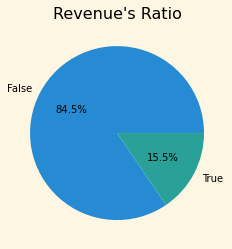

In [ ]:
counts = df['Revenue'].value_counts(normalize=True)

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Revenue's Ratio")
plt.show()

## Multivariate Analysis

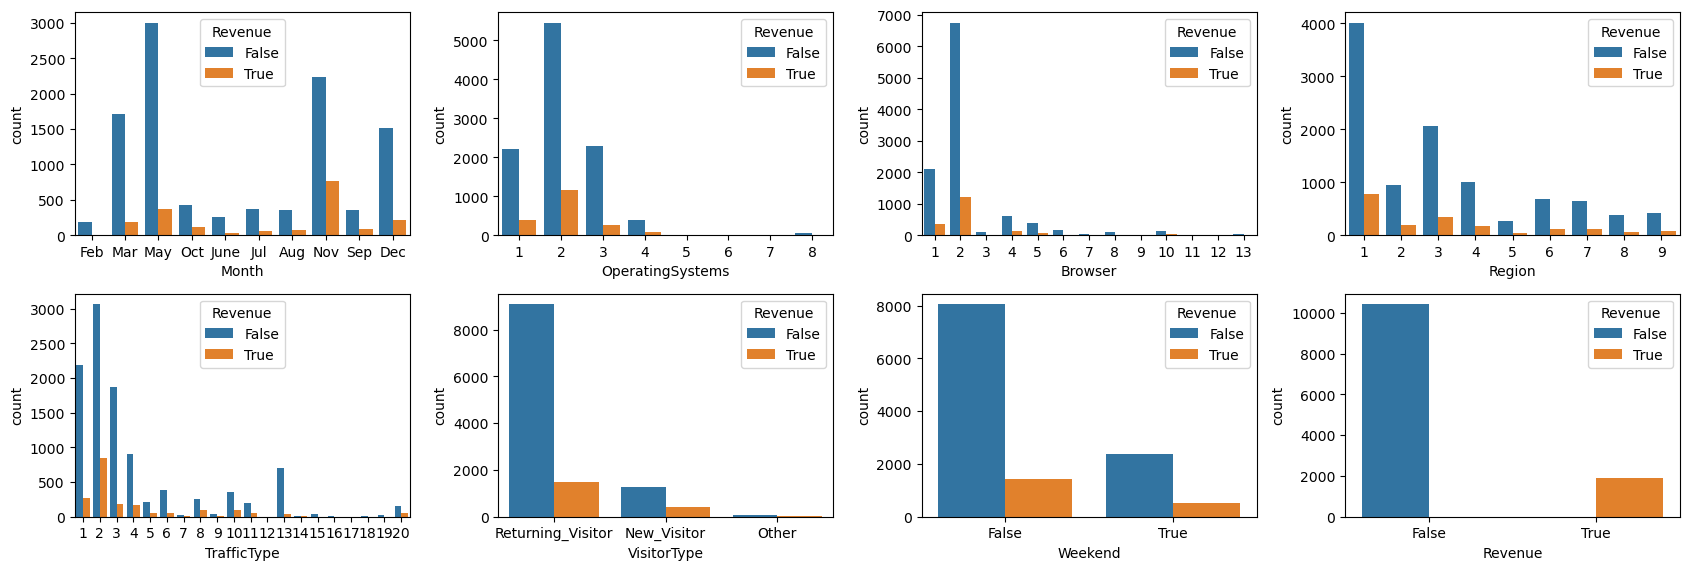

In [ ]:
plt.style.use('default')
f = categorical
plt.figure(figsize=(17,11))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=f[i],hue = 'Revenue',data=df)
    plt.tight_layout()

<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

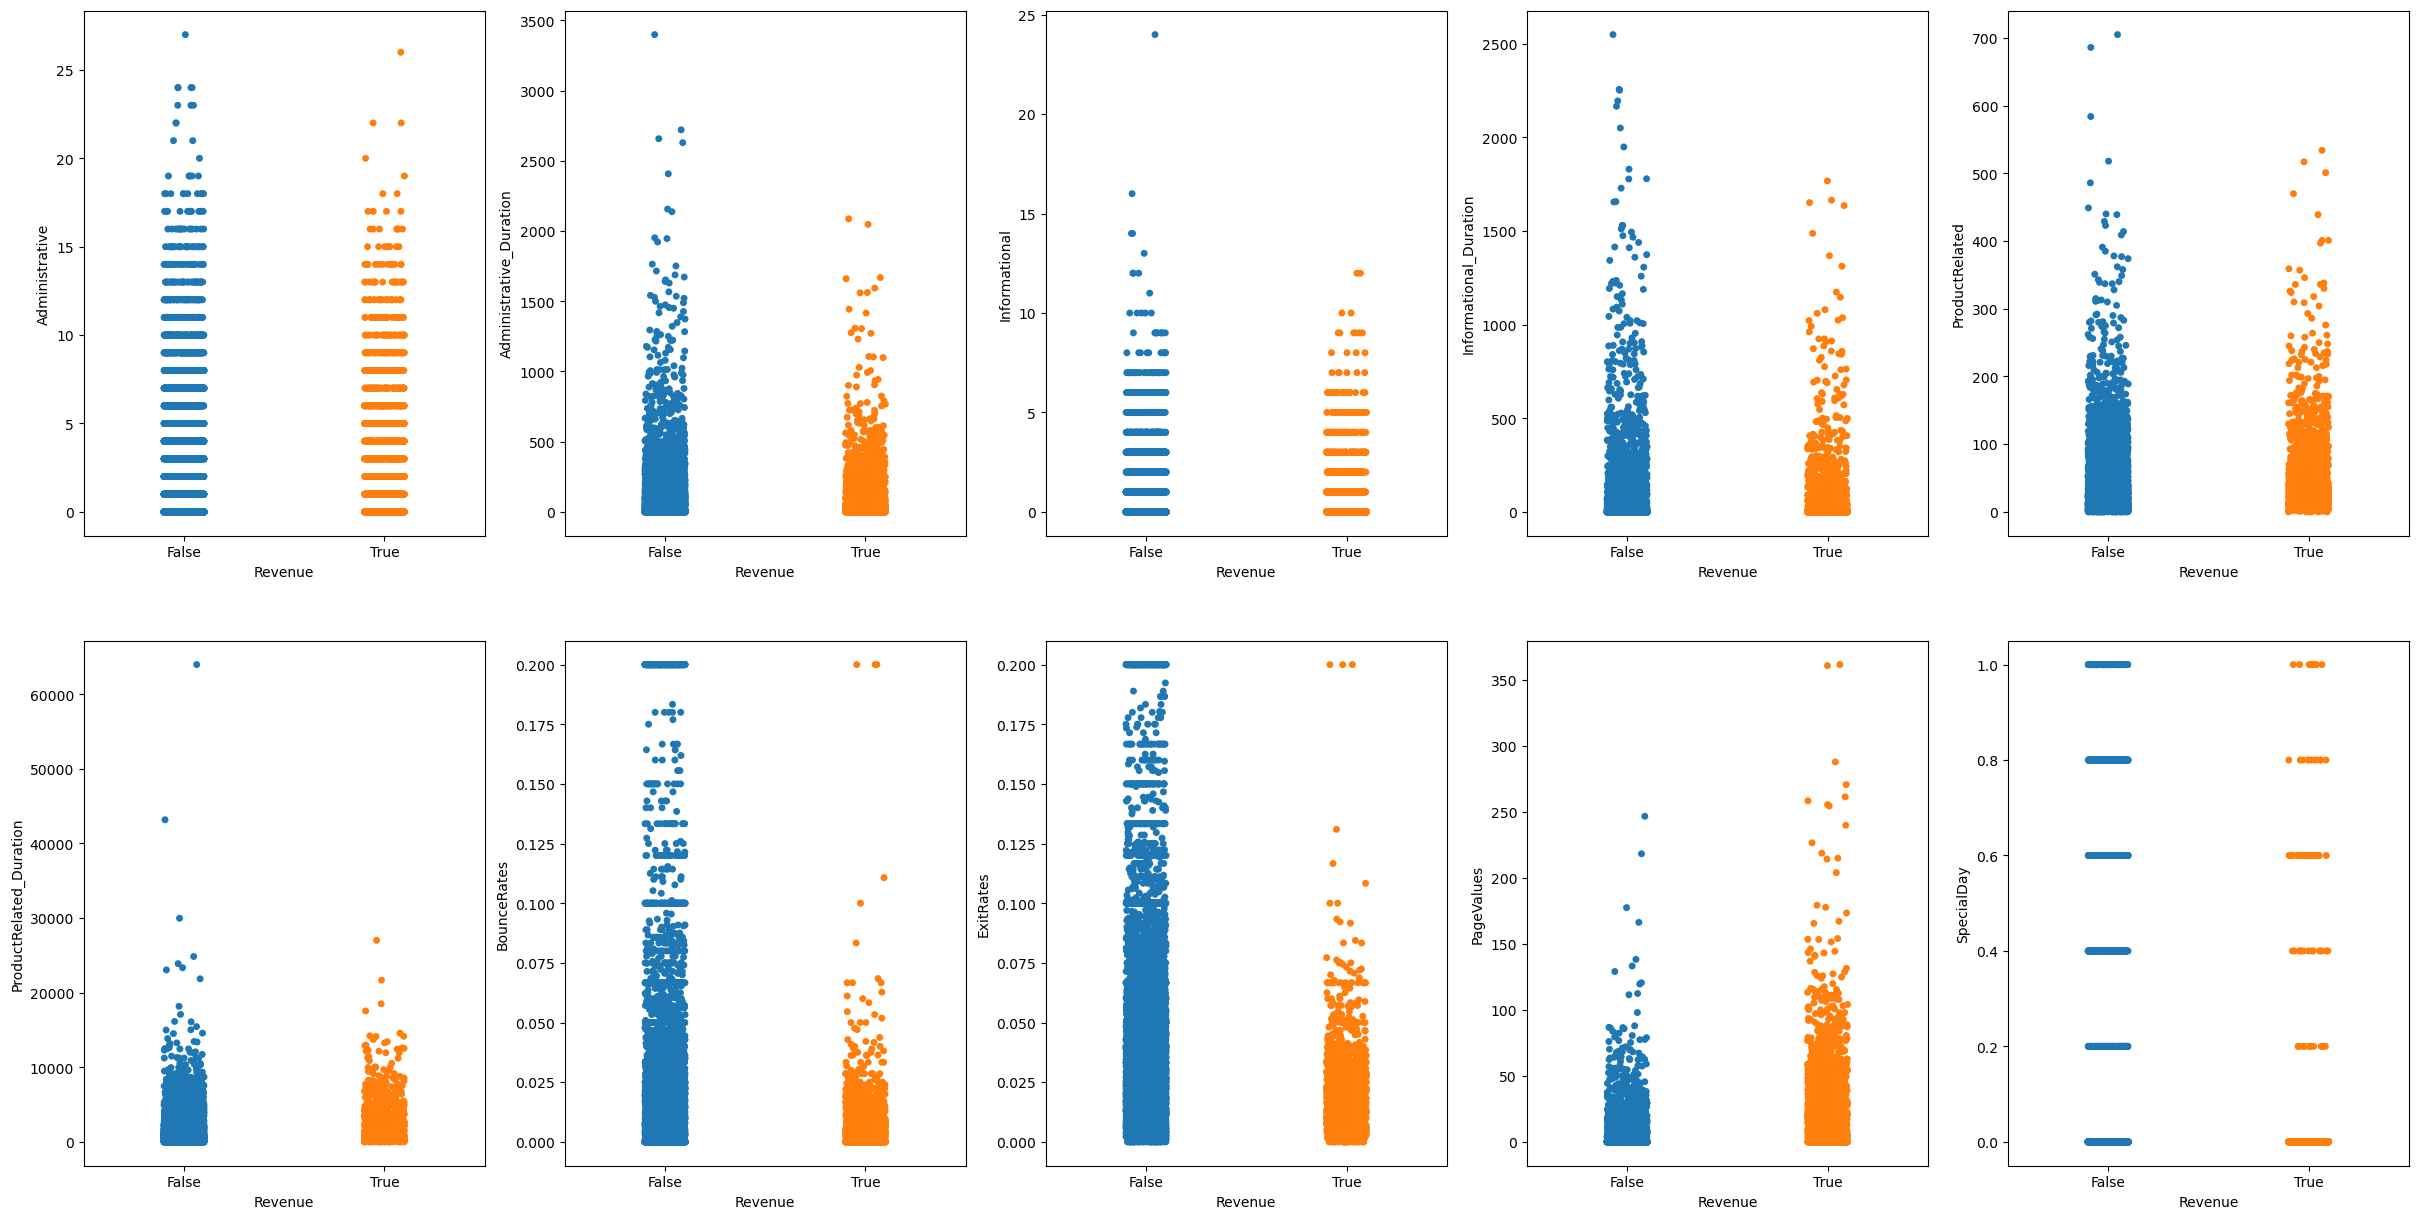

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(30,15))
sns.stripplot(ax=ax[0,0], data=df, x='Revenue', y='Administrative')
sns.stripplot(ax=ax[0,1], data=df, x='Revenue', y='Administrative_Duration')
sns.stripplot(ax=ax[0,2], data=df, x='Revenue', y='Informational')
sns.stripplot(ax=ax[0,3], data=df, x='Revenue', y='Informational_Duration')
sns.stripplot(ax=ax[0,4], data=df, x='Revenue', y='ProductRelated')
sns.stripplot(ax=ax[1,0], data=df, x='Revenue', y='ProductRelated_Duration')
sns.stripplot(ax=ax[1,1], data=df, x='Revenue', y='BounceRates')
sns.stripplot(ax=ax[1,2], data=df, x='Revenue', y='ExitRates')
sns.stripplot(ax=ax[1,3], data=df, x='Revenue', y='PageValues')
sns.stripplot(ax=ax[1,4], data=df, x='Revenue', y='SpecialDay')

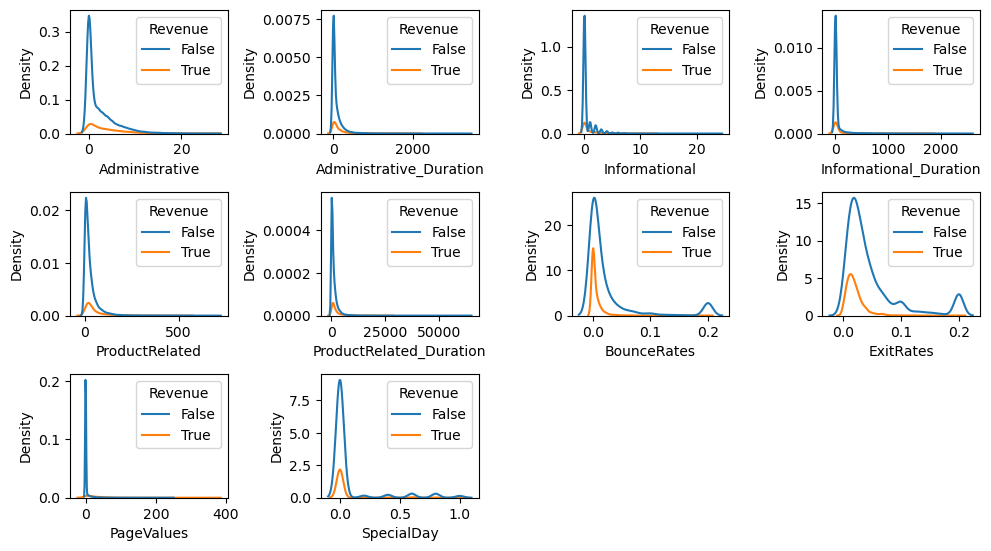

In [ ]:
plt.style.use('default')
f = numerical
plt.figure(figsize=(10,7))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=f[i],hue = 'Revenue',data=df)
    plt.tight_layout()

<AxesSubplot:>

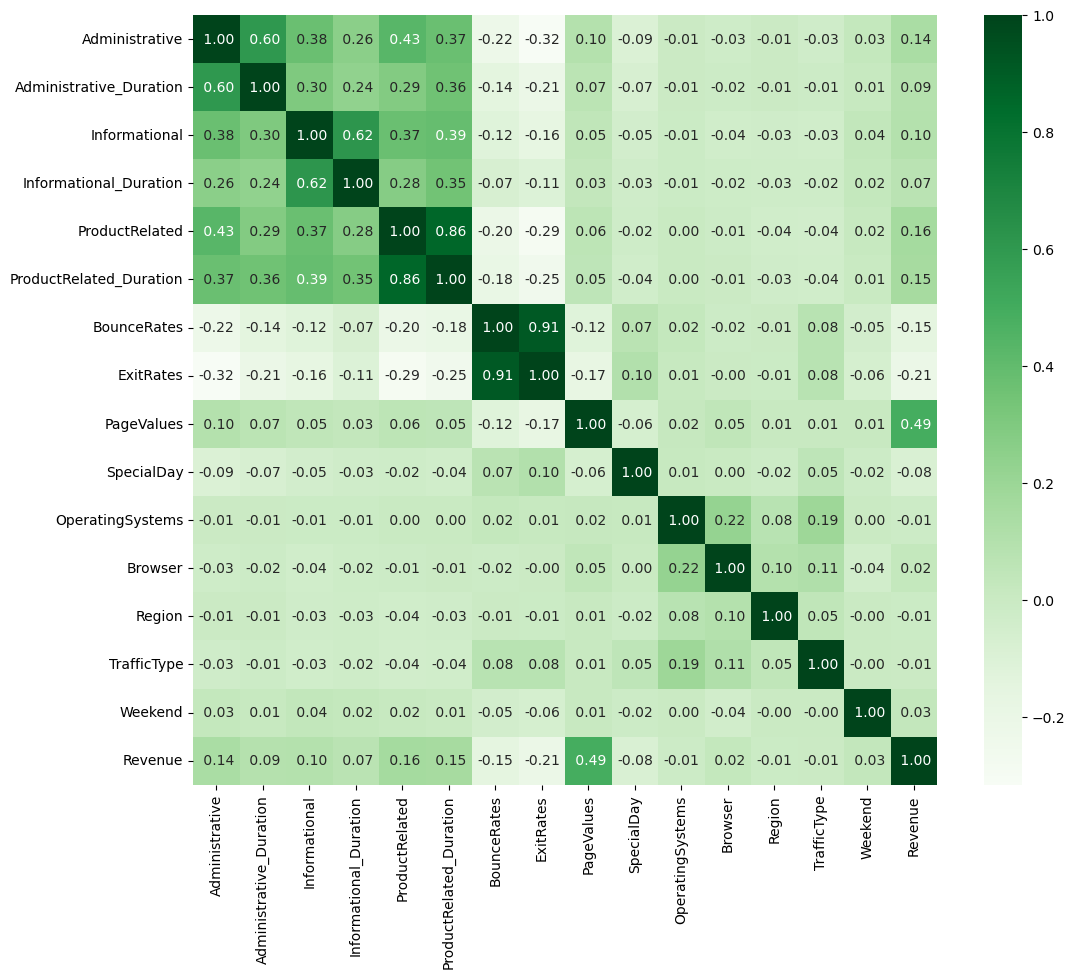

In [ ]:
# Kolom Numerical

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="Greens", annot=True, fmt=' .2f')

In [ ]:
#merubah kolom Weekend menjadi binomial agar bisa dibuat pairplot
df['weekend'] = np.where(df['Weekend'] == True, 1,0)
#menghapus kolom Weekend yang lama
df_copy = df.drop(['Weekend'] , axis=1)
df_copy.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue,weekend
1966,0,0.00,0,0.00,17,588.67,0.01,0.04,0.00,0.00,Mar,2,4,4,1,Returning_Visitor,False,0
6370,1,249.80,2,722.90,8,"2,219.58",0.00,0.00,0.00,0.00,Nov,2,4,4,2,New_Visitor,False,0
11257,2,270.00,3,228.50,13,"2,451.00",0.00,0.02,42.22,0.00,Nov,2,2,4,2,Returning_Visitor,True,0
3918,0,0.00,0,0.00,36,777.22,0.03,0.02,0.00,1.00,May,1,1,7,3,Returning_Visitor,False,1
10139,9,116.54,4,208.67,57,"1,813.25",0.00,0.01,30.61,0.00,Nov,1,2,1,2,Returning_Visitor,True,0


In [ ]:
#membuat pair plot
plt.figure(figsize=(15, 15))
sns.pairplot(df_copy, diag_kind='kde', hue = 'Revenue')

## Insight

1.Visitor terbanyak ada pada bulan Mei, tetapi transaksi terbanyak ada pada bulan November, sehingga perlu dilakukan campaign pada bulan Mei dan November.

2.Returning type paling banyak melakukan transaksi adalah type returning visitor. Pengunjung dengan tipe Returning sebaiknya diberikan campaign produk-produk yang menarik.

3.Non-weekend lebih banyak dilakukan transaksi dibanding weekend. 

4.Jumlah returning visitor mencapai 10.4K, ini lebih banyak dibandingkan dengan new visitor yang jumlahnya hanya 1.9K sementara persentase dari pengunjung yang melakukan transaksi hanya 15.5% dari seluruh pengunjung toko online.

5.Nilai pagevalues yang tinggi mempunyai peluang untuk melakukan transaksi.

6.Pengunjung dengan Bouncerates dan Exitrates yang tinggi cenderung tidak melakukan transaksi atau False.


# Preprocessing

## Drop Feature yang tidak relevan

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df_copy = df_copy.drop(columns=['ProductRelated_Duration','BounceRates','OperatingSystems',
                       'Browser','Region','TrafficType'], axis=1)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue,weekend
0,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,False,0
1,0,0.00,0,0.00,2,0.10,0.00,0.00,Feb,Returning_Visitor,False,0
2,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,False,0
3,0,0.00,0,0.00,2,0.14,0.00,0.00,Feb,Returning_Visitor,False,0
4,0,0.00,0,0.00,10,0.05,0.00,0.00,Feb,Returning_Visitor,False,1


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ExitRates                12330 non-null  float64
 6   PageValues               12330 non-null  float64
 7   SpecialDay               12330 non-null  float64
 8   Month                    12330 non-null  object 
 9   VisitorType              12330 non-null  object 
 10  Revenue                  12330 non-null  bool   
 11  weekend                  12330 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(3), object(2)
memory usage: 1023.6+ KB


## Missing Value

In [ ]:
df_copy.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
VisitorType                0
Revenue                    0
weekend                    0
dtype: int64

## Duplicate

In [ ]:
df_copy.duplicated(keep=False).sum()

2029

In [ ]:
df_copy=df_copy.drop_duplicates(keep='first')
df_copy.duplicated().sum()

0

## Outlier

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10749 entries, 0 to 12328
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           10749 non-null  int64  
 1   Administrative_Duration  10749 non-null  float64
 2   Informational            10749 non-null  int64  
 3   Informational_Duration   10749 non-null  float64
 4   ProductRelated           10749 non-null  int64  
 5   ExitRates                10749 non-null  float64
 6   PageValues               10749 non-null  float64
 7   SpecialDay               10749 non-null  float64
 8   Month                    10749 non-null  object 
 9   VisitorType              10749 non-null  object 
 10  Revenue                  10749 non-null  bool   
 11  weekend                  10749 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(3), object(2)
memory usage: 976.2+ KB


In [ ]:
kolom = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated', 
         'ExitRates','PageValues','SpecialDay','weekend']
for i in kolom:
    Q1 = df_copy[i].quantile(0.25)
    Q3 = df_copy[i].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    
    filter = ((df_copy[i] >= low_limit) & (df_copy[i] <= high_limit))
df_copy_fil = df_copy[filter]
df_copy_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8107 entries, 0 to 12328
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8107 non-null   int64  
 1   Administrative_Duration  8107 non-null   float64
 2   Informational            8107 non-null   int64  
 3   Informational_Duration   8107 non-null   float64
 4   ProductRelated           8107 non-null   int64  
 5   ExitRates                8107 non-null   float64
 6   PageValues               8107 non-null   float64
 7   SpecialDay               8107 non-null   float64
 8   Month                    8107 non-null   object 
 9   VisitorType              8107 non-null   object 
 10  Revenue                  8107 non-null   bool   
 11  weekend                  8107 non-null   int32  
dtypes: bool(1), float64(5), int32(1), int64(3), object(2)
memory usage: 736.3+ KB


## Drop Baris Nilai Other pada kolom VisitorType

In [ ]:
df_copy_fil['VisitorType'].value_counts(normalize=True)

Returning_Visitor   0.85
New_Visitor         0.14
Other               0.01
Name: VisitorType, dtype: float64

In [ ]:
index_other = df_copy_fil[df_copy_fil['VisitorType']=='Other'].index
df_copy2 = df_copy_fil.drop(index_other, axis=0).reset_index(drop=True)
df_copy2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue,weekend
0,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,False,0
1,0,0.00,0,0.00,2,0.10,0.00,0.00,Feb,Returning_Visitor,False,0
2,0,0.00,0,0.00,2,0.14,0.00,0.00,Feb,Returning_Visitor,False,0
3,0,0.00,0,0.00,19,0.02,0.00,0.00,Feb,Returning_Visitor,False,0
4,0,0.00,0,0.00,1,0.20,0.00,0.40,Feb,Returning_Visitor,False,0


## Memisahkan Data Feature dan Data Target

In [ ]:
df_feature = df_copy2.drop('Revenue', axis=1)

In [ ]:
df_target = df_copy2['Revenue']

In [ ]:
df_feature.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
0,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,0
1,0,0.00,0,0.00,2,0.10,0.00,0.00,Feb,Returning_Visitor,0


In [ ]:
df_target.head(2)

0    False
1    False
Name: Revenue, dtype: bool

## Merubah Tipe Data

In [ ]:
df_feature['weekend']=df_feature['weekend'].astype('int')

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df_feature, df_target, test_size=0.2, random_state=42)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6439, 11)
(1610, 11)
(6439,)
(1610,)


## Feature Transformation

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 1922 to 7270
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           6439 non-null   int64  
 1   Administrative_Duration  6439 non-null   float64
 2   Informational            6439 non-null   int64  
 3   Informational_Duration   6439 non-null   float64
 4   ProductRelated           6439 non-null   int64  
 5   ExitRates                6439 non-null   float64
 6   PageValues               6439 non-null   float64
 7   SpecialDay               6439 non-null   float64
 8   Month                    6439 non-null   object 
 9   VisitorType              6439 non-null   object 
 10  weekend                  6439 non-null   int32  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 578.5+ KB


In [ ]:
Xtrain.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'VisitorType', 'weekend'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Xtrain['Administrative_std'] = StandardScaler().fit_transform(Xtrain['Administrative'].values.reshape(len(Xtrain),1))
Xtrain['Administrative_Duration_std'] = StandardScaler().fit_transform(Xtrain['Administrative_Duration'].values.reshape(len(Xtrain),1))
Xtrain['Informational_std'] = StandardScaler().fit_transform(Xtrain['Informational'].values.reshape(len(Xtrain),1))
Xtrain['Informational_Duration_std'] = StandardScaler().fit_transform(Xtrain['Informational_Duration'].values.reshape(len(Xtrain),1))
Xtrain['ProductRelated_std'] = StandardScaler().fit_transform(Xtrain['ProductRelated'].values.reshape(len(Xtrain),1))
Xtrain['ExitRates_std'] = StandardScaler().fit_transform(Xtrain['ExitRates'].values.reshape(len(Xtrain),1))
Xtrain['PageValues_std'] = StandardScaler().fit_transform(Xtrain['PageValues'].values.reshape(len(Xtrain),1))
Xtrain['SpecialDay_std'] = StandardScaler().fit_transform(Xtrain['SpecialDay'].values.reshape(len(Xtrain),1))
Xtrain['weekend_std'] = StandardScaler().fit_transform(Xtrain['weekend'].values.reshape(len(Xtrain),1))

Xtrain_std = Xtrain.drop(['Administrative', 'Administrative_Duration', 'Informational', 
                                  'Informational_Duration', 'ProductRelated', 'ExitRates', 
                                  'PageValues', 'SpecialDay','weekend'], axis=1)

Xtrain_std.head()

,Month,VisitorType,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ExitRates_std,PageValues_std,SpecialDay_std,weekend_std
1922,May,Returning_Visitor,-0.77,-0.49,-0.42,-0.26,-0.38,-0.10,-0.34,3.75,0.00
6146,Nov,Returning_Visitor,0.39,0.03,-0.42,-0.26,0.05,-0.47,-0.34,-0.35,0.00
2913,May,Returning_Visitor,-0.77,-0.49,-0.42,-0.26,-0.08,0.16,-0.34,-0.35,0.00
6519,Dec,Returning_Visitor,0.10,-0.29,-0.42,-0.26,0.68,-0.67,-0.34,-0.35,0.00
4800,Aug,Returning_Visitor,0.39,1.42,-0.42,-0.26,-0.58,-0.00,1.40,-0.35,0.00


## Encoding

In [ ]:
# Label Encoding Kolom VisitorType

In [ ]:
Xtrain_std['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [ ]:
mapping_visitortype = {'Returning_Visitor':1, 'New_Visitor':0}
Xtrain_std['VisitorType'] = Xtrain_std['VisitorType'].map(mapping_visitortype)
Xtrain_std.head(3)

,Month,VisitorType,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ExitRates_std,PageValues_std,SpecialDay_std,weekend_std
1922,May,1,-0.77,-0.49,-0.42,-0.26,-0.38,-0.10,-0.34,3.75,0.00
6146,Nov,1,0.39,0.03,-0.42,-0.26,0.05,-0.47,-0.34,-0.35,0.00
2913,May,1,-0.77,-0.49,-0.42,-0.26,-0.08,0.16,-0.34,-0.35,0.00


In [ ]:
# Label Encoding Kolom Month

In [ ]:
Xtrain_std['Month'].unique()

array(['May', 'Nov', 'Dec', 'Aug', 'Sep', 'Mar', 'Jul', 'Feb', 'Oct',
       'June'], dtype=object)

In [ ]:
mapping_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
Xtrain_std['Month'] = Xtrain_std['Month'].map(mapping_month)
Xtrain_std.head(3)

,Month,VisitorType,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ExitRates_std,PageValues_std,SpecialDay_std,weekend_std
1922,5,1,-0.77,-0.49,-0.42,-0.26,-0.38,-0.10,-0.34,3.75,0.00
6146,11,1,0.39,0.03,-0.42,-0.26,0.05,-0.47,-0.34,-0.35,0.00
2913,5,1,-0.77,-0.49,-0.42,-0.26,-0.08,0.16,-0.34,-0.35,0.00


In [ ]:
Xtrain_std.isna().sum()

Month                          0
VisitorType                    0
Administrative_std             0
Administrative_Duration_std    0
Informational_std              0
Informational_Duration_std     0
ProductRelated_std             0
ExitRates_std                  0
PageValues_std                 0
SpecialDay_std                 0
weekend_std                    0
dtype: int64

## Class Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling
Xtrain_std_sampling, ytrain_sampling = over_sampling.SMOTE().fit_resample(Xtrain_std, ytrain)

In [ ]:
ytrain_sampling.value_counts()

False    5347
True     5347
Name: Revenue, dtype: int64